Name: Nikhil Rawat

# Import Necessary Libraries 

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Part 1: Preparing the Data

## 1. Data Segmentation

### Based on the discrepancies in data format, including a broader historical range in Data_B from 1963 to 2021.
### Dividing into two dataset one Data_A from 2015-2019 and other is Data_B from 2020-2021

In [2]:
# Define a list of column sets that should be merged
columns_to_merge = {
    'Serial_no': ['Unnamed: 0', 'Sr. No.'],
    'Date': ['Date(dd/mm/yyyy)', 'Date','Founding Date'],
    'Founder': ['Founders'],
    'Startup_name': ['Startup Name'],
    'About_company': ['Sub-Vertical'],
    'Industry_vertical': ['Industry/ Vertical', 'Industry/Vertical', 'Industry Vertical'],
    'City_location': ['City / Location', 'City'],
    'Investors_name': ['Investors’ Name', 'Investor Name', 'Investors', 'Investors_name'],
    'Investment_type': ['Invest-mentType', 'InvestmentType', 'Investment Type', 'Investment Stage'],
    'Amount_usd': ['Amount (in USD)', 'Amount(in USD)'],
    'Remarks': [ 'Remarks'],
}

In [3]:
# Set the directory where CSV files are stored
folder_path_2015_19 = '/Users/nick/Downloads/StartUp_2015-2019'

# Get a list of all CSV files in the directory
all_files_2015_19 = [file for file in os.listdir(folder_path_2015_19) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
data_A_list = []

# Loop through all files and read them into DataFrames
for file in all_files_2015_19:
    file_path_A = os.path.join(folder_path_2015_19, file)
    data_A = pd.read_csv(file_path_A)

    # Standardize and merge column names
    new_columns = {}
    for standard_col, variations in columns_to_merge.items():
        for col in variations:
            if col in data_A.columns:
                # Rename the found variation to the standard column name
                new_columns[col] = standard_col
    data_A.rename(columns=new_columns, inplace=True)

    # Merge columns if necessary (taking non-null values)
    for standard_col, variations in columns_to_merge.items():
        if standard_col in data_A.columns:
            # Fill missing values in the standard column with data from its variations
            for col in variations:
                if col in data_A.columns:
                    data_A[standard_col] = data_A[standard_col].combine_first(data_A[col])

    # Drop old variation columns that have been merged
    data_A.drop(columns=[col for col in data_A.columns if col not in columns_to_merge], inplace=True)

    # Append the DataFrame to the list
    data_A_list.append(data_A)

# Concatenate all the DataFrames in the list
combined_data_A = pd.concat(data_A_list, ignore_index=True)

# Drop columns and rows that are completely empty
combined_data_A.dropna(axis=1, how='all', inplace=True)
combined_data_A.dropna(axis=0, how='all', inplace=True)

# Specify the path to your Downloads directory on Mac
output_file_2015_19 = '/Users/nick/Downloads/startups_data_2015-19.csv'

# Save the combined DataFrame to a CSV file
combined_data_A.to_csv(output_file_2015_19, index=False)

print(f"Combined CSV saved at {output_file_2015_19}")


Combined CSV saved at /Users/nick/Downloads/startups_data_2015-19.csv


In [4]:
# Set the directory where your CSV files are stored
folder_path_2020_21 = '/Users/nick/Downloads/StartUp_2020-2021'

# Get a list of all CSV files in the directory
all_files_2020_21 = [file for file in os.listdir(folder_path_2020_21) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
data_B_list = []

# Loop through all files and read them into DataFrames
for file in all_files_2020_21:
    file_path_B = os.path.join(folder_path_2020_21, file)
    data_B = pd.read_csv(file_path_B)

    # Standardize and merge column names
    new_columns = {}
    for standard_col, variations in columns_to_merge.items():
        for col in variations:
            if col in data_B.columns:
                # Rename the found variation to the standard column name
                new_columns[col] = standard_col
    data_B.rename(columns=new_columns, inplace=True)

    # Merge columns if necessary (taking non-null values)
    for standard_col, variations in columns_to_merge.items():
        if standard_col in data_B.columns:
            # Fill missing values in the standard column with data from its variations
            for col in variations:
                if col in data_B.columns:
                    data_B[standard_col] = data_B[standard_col].combine_first(data_B[col])

    # Drop old variation columns that have been merged
    data_B.drop(columns=[col for col in data_B.columns if col not in columns_to_merge], inplace=True)

    # Append the DataFrame to the list
    data_B_list.append(data_B)

# Concatenate all the DataFrames in the list
combined_data_B = pd.concat(data_B_list, ignore_index=True)

# Drop columns and rows that are completely empty
combined_data_B.dropna(axis=1, how='all', inplace=True)
combined_data_B.dropna(axis=0, how='all', inplace=True)

# Specify the path to your Downloads directory on Mac
output_file_2020_21 = '/Users/nick/Downloads/Startups_2020-21.csv'

# Save the combined DataFrame to a CSV file
combined_data_B.to_csv(output_file_2020_21, index=False)

print(f"Combined CSV saved at {output_file_2020_21}")

Combined CSV saved at /Users/nick/Downloads/Startups_2020-21.csv


### Datasets Overview

In [5]:
# Display Data_2015_19
combined_data_A

,Serial_no,Date,Startup_name,Industry_vertical,About_company,City_location,Investors_name,Investment_type,Amount_usd,Remarks
0,1.0,01/05/2017,Ace2three,Consumer Internet,Online Rummy playing Website,Hyderabad,Clairvest Group,Private Equity,"73,700,000",NaN
1,2.0,01/05/2017,Power2SME,eCommerce,Buying portal for SMEs,Gurgaon,International Finance Corporation,Private Equity,"10,000,000",NaN
2,3.0,02/05/2017,Innovapptive,Technology,Enterprise Mobility Solutions,Hyderabad,Hyderabad Angels,Seed Funding,"1,500,000",NaN
3,4.0,02/05/2017,4tigo,Logistics,Truck Network company,Bangalore,"Accel Partners, Nandan Nilekani,",Private Equity,"10,000,000",NaN
4,5.0,02/05/2017,SMECorner,Consumer Internet,Online Platform for small business loans,Mumbai,Dutch government fund,Private Equity,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3109,51.0,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
3110,52.0,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
3111,53.0,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
3112,54.0,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [6]:
# Display Data_2020_21
combined_data_B

,Serial_no,Startup_name,Date,City_location,Industry_vertical,About_company,Founder,Investors_name,Amount_usd,Investment_type
0,0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN
1,1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed
2,2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed
3,3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN
4,4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2182,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2183,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2184,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2185,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Diagnosis

In [7]:
# Check the number of missing values in each column in combined_data_A
missing_values_count_A = combined_data_A.isna().sum()

# Print out the missing values count for each column
print(missing_values_count_A)

# Calculate the total number of rows in combined_data_A
total_rows_A = len(combined_data_A)

# Calculate the percentage of missing values for each column
missing_percentage_A = (missing_values_count_A / total_rows_A) * 100

# Print the percentage of missing values for each column
print(missing_percentage_A)

Serial_no               0
Date                   21
Startup_name           37
Industry_vertical     208
About_company         973
City_location         217
Investors_name         61
Investment_type        40
Amount_usd           1006
Remarks              2680
dtype: int64
Serial_no             0.000000
Date                  0.677638
Startup_name          1.193934
Industry_vertical     6.711843
About_company        31.397225
City_location         7.002259
Investors_name        1.968377
Investment_type       1.290739
Amount_usd           32.462085
Remarks              86.479510
dtype: float64


In [8]:
# Check the number of missing values in each column in combined_data_B
missing_values_count_B = combined_data_B.isna().sum()

# Print out the missing values count for each column
print(missing_values_count_B)

# Calculate the total number of rows in combined_data_B
total_rows_B = len(combined_data_B)

# Calculate the percentage of missing values for each column
missing_percentage_B = (missing_values_count_B / total_rows_B) * 100

# Print the percentage of missing values for each column
print(missing_percentage_B)

Serial_no              0
Startup_name          59
Date                 222
City_location        127
Industry_vertical     67
About_company         59
Founder               73
Investors_name       159
Amount_usd            65
Investment_type      888
dtype: int64
Serial_no             0.000000
Startup_name          2.697759
Date                 10.150892
City_location         5.807042
Industry_vertical     3.063557
About_company         2.697759
Founder               3.337906
Investors_name        7.270233
Amount_usd            2.972108
Investment_type      40.603567
dtype: float64


## 2.	Standardization 

### Removing empty rows in the start-up 

In [9]:
# Remove rows where 'Startup_name' has missing values and assign to data_A1
data_A1 = combined_data_A.dropna(subset=['Startup_name'])

# Check the number of remaining missing values in each column after removal
missing_values_count_A = data_A1.isna().sum()

# Print the count of missing values for each column
print(missing_values_count_A)

# Calculate the total number of rows in data_A1
total_rows_A = len(data_A1)

# Calculate the percentage of missing values for each column
missing_percentage_A = (missing_values_count_A / total_rows_A) * 100

# Print the percentage of missing values for each column
print(missing_percentage_A)

Serial_no               0
Date                    0
Startup_name            0
Industry_vertical     171
About_company         936
City_location         180
Investors_name         24
Investment_type         3
Amount_usd            969
Remarks              2643
dtype: int64
Serial_no             0.000000
Date                  0.000000
Startup_name          0.000000
Industry_vertical     5.584585
About_company        30.568256
City_location         5.878511
Investors_name        0.783801
Investment_type       0.097975
Amount_usd           31.645983
Remarks              86.316133
dtype: float64


In [10]:
# Remove rows where 'Startup_name' has missing values and assign to data_B1
data_B1 = combined_data_B.dropna(subset=['Startup_name'])

# Check the number of missing values in each column in data_B1
missing_values_count_B = data_B1.isna().sum()

# Print out the missing values count for each column
print(missing_values_count_B)

# Check the percentage of missing values for each column
total_rows_B = len(data_B1)
missing_percentage_B = (missing_values_count_B / total_rows_B) * 100
print(missing_percentage_B)

Serial_no              0
Startup_name           0
Date                 163
City_location         68
Industry_vertical      8
About_company          0
Founder               14
Investors_name       100
Amount_usd             6
Investment_type      829
dtype: int64
Serial_no             0.000000
Startup_name          0.000000
Date                  7.659774
City_location         3.195489
Industry_vertical     0.375940
About_company         0.000000
Founder               0.657895
Investors_name        4.699248
Amount_usd            0.281955
Investment_type      38.956767
dtype: float64


### Removing columns with high missing values and those irrelevant to our analysis

In [11]:
# Remove the columns 'Remarks', 'Serial_no', and 'About_company' from data_A1 and assign to data_A2
data_A2 = data_A1.drop(columns=['Remarks', 'Serial_no', 'About_company'])

# Display the first few rows of the updated DataFrame data_A2 to confirm that the columns are removed
data_A2.head()

,Date,Startup_name,Industry_vertical,City_location,Investors_name,Investment_type,Amount_usd
0,01/05/2017,Ace2three,Consumer Internet,Hyderabad,Clairvest Group,Private Equity,"73,700,000"
1,01/05/2017,Power2SME,eCommerce,Gurgaon,International Finance Corporation,Private Equity,"10,000,000"
2,02/05/2017,Innovapptive,Technology,Hyderabad,Hyderabad Angels,Seed Funding,"1,500,000"
3,02/05/2017,4tigo,Logistics,Bangalore,"Accel Partners, Nandan Nilekani,",Private Equity,"10,000,000"
4,02/05/2017,SMECorner,Consumer Internet,Mumbai,Dutch government fund,Private Equity,NaN


In [12]:
# Remove the columns 'Serial_no', 'Founder', and 'About_company' from data_B1 and assign to data_B2
data_B2 = data_B1.drop(columns=['Serial_no', 'Founder', 'About_company'])

# Display the first few rows of the updated DataFrame
data_B2.head()

,Startup_name,Date,City_location,Industry_vertical,Investors_name,Amount_usd,Investment_type
0,Aqgromalin,2019,Chennai,AgriTech,Angel investors,"$200,000",NaN
1,Krayonnz,2019,Bangalore,EdTech,GSF Accelerator,"$100,000",Pre-seed
2,PadCare Labs,2018,Pune,Hygiene management,Venture Center,Undisclosed,Pre-seed
3,NCOME,2020,New Delhi,Escrow,"Venture Catalysts, PointOne Capital","$400,000",NaN
4,Gramophone,2016,Indore,AgriTech,"Siana Capital Management, Info Edge","$340,000",NaN


# 3.	Date Handling 

### Data_A has no missing values in its date column.

### Date Correction for Data_B

In [13]:
# Check for non-numeric values and convert 'Date' to integers
data_B2['Date'] = pd.to_numeric(data_B2['Date'], errors='coerce')  # Converts non-numeric to NaN

# Calculate mean, median, and mode of the 'Date' column
mean_date = data_B2['Date'].mean()
median_date = data_B2['Date'].median()
mode_date = data_B2['Date'].mode()[0]  # mode() returns a Series, get the first mode

# Print the results
print(f"Mean Date: {mean_date}")
print(f"Median Date: {median_date}")
print(f"Mode Date: {mode_date}")

Mean Date: 2016.1303462321791
Median Date: 2017.0
Mode Date: 2020.0


In [14]:
# Calculate the mode of the 'Date' column
mode_date = data_B2['Date'].mode()[0]

# Calculate the frequency of the mode
mode_frequency = data_B2['Date'].value_counts().loc[mode_date]

# Print the mode date and its frequency
print(f"Mode Date: {mode_date}")
print(f"Frequency of Mode Date: {mode_frequency}")

# Calculate the frequency percentage of the mode date
mode_frequency_percentage = mode_frequency / data_B2['Date'].count() * 100

# Print the frequency percentage of the mode date
print(f"Frequency Percentage of Mode Founding Date: {mode_frequency_percentage:.2f}%")

Mode Date: 2020.0
Frequency of Mode Date: 277
Frequency Percentage of Mode Founding Date: 14.10%


As per my analsis, I initially explored multiple approaches to impute these missing values, including mean, median, and mode imputation. But for my analysis purpose, I required either 2020 or 2021 otherwise, it becomes irrelevant.

Upon closer examination, I discovered that the mode of the date column suggested a predominant occurrence of 2020. However, a deeper investigation revealed that only approximately 14% of the overall dates corresponded to the year 2020, which doesnt seems siggnificant.
So, I come up with a conclusion of excluding the missing date rows from data_B2.

In [15]:
# Remove any rows in data_B2 where 'Date' is NaN.
data_B2 = data_B2.dropna(subset=['Date'])

# Convert the 'Date' column to an integer data type.
data_B2['Date'] = data_B2['Date'].astype(int)

Becuase of information overlap, I exclued entries prior 2020 as I already have considered them from 2015-2019 dataset for my analysis.

In [16]:
# Create a new DataFrame, data_B3, containing only records from 2020 onwards.
data_B3 = data_B2[data_B2['Date'] >= 2020]

Changing date format to match up with data_A format. I can only change 2020 to 01/01/2020 as no other detail is given, While this adjustment prevents me from analyzing the data monthly for 2020-21, but it allows for a comparative analysis of yearly trends from 2015 to 2021.

In [17]:
# Convert the year integer to a date string 
data_B3['Date'] = pd.to_datetime(data_B3['Date'], format='%Y').dt.strftime('%d/%m/%Y')

In [18]:
# Calculate the number of remaining missing values in each column in DataFrame B3.
missing_values_count_B = data_B3.isna().sum()

# Print the count of missing values for each column in DataFrame B3.
print(missing_values_count_B)

# Calculate the total number of rows in DataFrame B3 (assuming total_rows_B should be based on data_B2).
total_rows_B = len(data_B2)

# Calculate the percentage of missing values for each column in DataFrame B3.
missing_percentage_B = (missing_values_count_B / total_rows_B) * 100

# Print the percentage of missing values for each column in DataFrame B3.
print(missing_percentage_B)

Startup_name          0
Date                  0
City_location         3
Industry_vertical     0
Investors_name       21
Amount_usd            4
Investment_type      92
dtype: int64
Startup_name         0.000000
Date                 0.000000
City_location        0.152749
Industry_vertical    0.000000
Investors_name       1.069246
Amount_usd           0.203666
Investment_type      4.684318
dtype: float64


### Merging Datasets

In [19]:
# Concatenate the dataframes
Startups_2015_21 = pd.concat([data_A2, data_B3], ignore_index=True)

In [20]:
# Save DataFrame to Excel
Startups_2015_21.to_excel('/Users/nick/Downloads/c.xlsx', index=False)  

## 4.	Missing Values Handling Strategy

In [21]:
# Calculate the number of remaining missing values in each column after removal.
missing_values_count = Startups_2015_21.isna().sum()

# Print the count of missing values for each column.
print(missing_values_count)

# Calculate the total number of rows in the DataFrame.
total_rows = len(Startups_2015_21)

# Calculate the percentage of missing values for each column.
missing_percentage = (missing_values_count / total_rows) * 100

# Print the percentage of missing values for each column.
print(missing_percentage)

Date                   0
Startup_name           0
Industry_vertical    171
City_location        183
Investors_name        45
Investment_type       95
Amount_usd           973
dtype: int64
Date                  0.000000
Startup_name          0.000000
Industry_vertical     5.007321
City_location         5.358712
Investors_name        1.317716
Investment_type       2.781845
Amount_usd           28.491947
dtype: float64


### Investment Types

Using dictionary to map similar kind of investment types to overcome data typos errors and can get better data for my analysis

In [22]:
# Dictionary mapping corrected investment types to alternative names
investment_type_mapping = {
    'Angel Funding': ['Angel', 'Angel / Seed Funding', 'Angel Round', 'Seed / Angel Funding', 'Seed / Angle Funding', 'Seed / Angel Funding', 'Seed+', 'Angel Funding'],
    'Bridge Round': ['Bridge', 'Bridge Round'],
    'Corporate Round': ['Corporate Round'],
    'Crowd Funding': ['Crowd funding'],
    'Debt Financing': ['Debt', 'Debt and Preference capital', 'Debt Funding', 'Debt-Funding', 'Structured Debt'],
    'Early Seed': ['Early seed'],
    'Equity Funding': ['Equity', 'Equity Based Funding', 'PrivateEquity', 'Private Equity', 'Private Equity Round', 'Private Funding', 'PE'],
    'Funding Round': ['Funding Round'],
    'Inhouse Funding': ['Inhouse Funding'],
    'Maiden Round': ['Maiden Round'],
    'Mezzanine Funding': ['Mezzanine'],
    'Mid Stage': ['Mid series'],
    'Pre Seed Round': ['Pre seed Round', 'Pre-Seed', 'Pre seed round'],
    'Pre Series A': ['pre-series A', 'Pre-series', 'Pre-series A', 'Pre- series A', 'Pre-seed', 'Pre-seed Round', 'Pre-series', 'Pre-Series A', 'Pre-series A', 'Pre-series A1', 'pre-Series A'],
    'Pre Series B': ['Pre series B', 'Pre-series B'],
    'Pre Series C': ['Pre series C', 'Pre-series C'],
    'Seed Funding': ['Seed', 'SeedFunding', 'Seed A', 'Seed Funding', 'Seed Funding Round', 'Seed Investment', 'Seed round', 'Seed Round & Series A', 'Seed/ Angel Funding'],
    'Series A': ['Series A', 'Seies A', 'Series A-1', 'Series A+', 'Series A2'],
    'Series B': ['Series B', 'Series B (Extension)', 'Series B2', 'Series B3'],
    'Series C': ['Series C', 'Series C, D'],
    'Series D': ['Series D', 'Series D1'],
    'Series E': ['Series E', 'Series E2'],
    'Series F': ['Series F', 'Series F1', 'Series F2'],
    'Series G': ['Series G'],
    'Series H': ['Series H'],
    'Series I': ['Series I'],
    'Series J': ['Series J'],
    'Term Loan': ['Term Loan'],
    'Venture Funding': ['Venture', 'Single Venture', 'Venture - Series Unknown', 'Venture Round'],
    'NaN' : ['$1000000', '$1200000', '$300000', '$6000000']
}


In [23]:
# Check if the 'Investment_type' column exists in the DataFrame
if 'Investment_type' in Startups_2015_21.columns:
    # Define a function to map investment types to standardized names
    def map_investment_type(investment_type):
        for key, values in investment_type_mapping.items():
            if investment_type in values:
                return key
        return investment_type  # Return the original type if not found in the mapping

    # Apply the mapping function to the 'Investment_type' column
    Startups_2015_21['Investment_type'] = Startups_2015_21['Investment_type'].apply(map_investment_type)
else:
    # Print a message if the 'Investment_type' column does not exist in the DataFrame
    print("Column 'Investment_type' does not exist in the DataFrame.")

In [24]:
# Print the unique values in the 'Investment_type' column to verify the updates.
print(Startups_2015_21['Investment_type'].unique())

['Equity Funding' 'Seed Funding' 'Angel Funding' 'Private'
 'Debt Financing' 'Seed/Angel Funding' 'Term Loan' 'Series C' 'Series D'
 'Series A' 'Series B' 'Mezzanine Funding' 'Series H' 'Venture Funding'
 nan 'Funding Round' 'Series F' 'Series E' 'Seed Round' 'Series G'
 'Corporate Round' 'Pre Series A' 'Seed funding' 'Inhouse Funding'
 'Maiden Round' 'Bridge Round' 'Series J' 'Crowd Funding' 'NaN'
 'Pre Seed Round' 'Early Seed' 'Pre Series B']


### Filling Investment type missing values using the top most prevalent investment type based on occurrence probability.

In [25]:
# Retrieve and store the top 3 most common investment types from the 'Investment_type' column.
top_three_Investment_type = Startups_2015_21['Investment_type'].value_counts().head(3)

# Print the names and counts of the top three investment types.
print(top_three_Investment_type)

Investment_type
Seed Funding      1613
Equity Funding    1371
Pre Series A        73
Name: count, dtype: int64


In [26]:
# Calculate the distribution of 'Seed Funding' and 'Equity Funding' investment types
investment_type_filtered = Startups_2015_21['Investment_type'].value_counts(normalize=True)
filtered_types = investment_type_filtered.loc[['Seed Funding', 'Equity Funding']]

# Normalize the probabilities to ensure they sum to 1
filtered_types /= filtered_types.sum()

# Define a function to fill missing investment types with 'Seed Funding' and 'Equity Funding'
def fill_missing_investment_types(row):
    if pd.isna(row['Investment_type']):
        # np.random.choice will choose between 'Seed Funding' and 'Equity Funding' based on updated probabilities
        return np.random.choice(filtered_types.index, p=filtered_types.values)
    else:
        return row['Investment_type']

# Apply the function to fill missing investment types in the 'Investment_type' column
Startups_2015_21['Investment_type'] = Startups_2015_21.apply(fill_missing_investment_types, axis=1)

### Industry Verticals

In [27]:
# Retrieve and store the top 3 most common industry verticals from the 'Industry_vertical' column.
top_three_industries = Startups_2015_21['Industry_vertical'].value_counts().head(3)

# Print the names and counts of the top three industry verticals.
print(top_three_industries)

Industry_vertical
Consumer Internet    959
Technology           482
eCommerce            189
Name: count, dtype: int64


To fill missing values, using the top two industries (Consumer Internet and Technology) based on their occurrence probability.

In [28]:
# Calculate the distribution of existing industries and limit to the top 2 most common.
Industry_type_counts = Startups_2015_21['Industry_vertical'].value_counts(normalize=True).head(2)

# Normalize the probabilities manually to ensure they sum to 1.
normalized_probs = Industry_type_counts / Industry_type_counts.sum()

# Define a function to fill missing industry types based on the normalized distribution.
def fill_missing_Industry_types(row):
    if pd.isna(row['Industry_vertical']):
        # Use the normalized probabilities which are guaranteed to sum to 1.
        return np.random.choice(Industry_type_counts.index, p=normalized_probs.values)
    else:
        return row['Industry_vertical']

# Apply the function to fill missing industry types in the 'Industry_vertical' column.
Startups_2015_21['Industry_vertical'] = Startups_2015_21.apply(fill_missing_Industry_types, axis=1)

### Funding Amount

Replacing non-numeric entries to NaN and converting the rest to numeric values

In [29]:
# Define the values to be replaced with NaN in the 'Amount_usd' column.
values_to_replace = ['Upsparks', 'unknown', 'Undisclosed', 'Undiclsosed', 
                     'Series C', 'Seed', 'Pre-series A', 
                     'JITO Angel Network, LetsVenture', 'ITO Angel Network, LetsVenture', 
                     'ah! Ventures', '$', '$Undisclosed', '$undisclosed', 'undisclosed', '$887,000, $23,000,000','$800,000,000 to $850,000,000','14,342,000+']

In [30]:
# Replace non-numeric values in 'Amount_usd' with NaN, allowing for accurate numerical analysis.
for value in values_to_replace:
    Startups_2015_21['Amount_usd'] = Startups_2015_21['Amount_usd'].replace(value, np.nan)

# Print the unique values in 'Amount_usd' to verify the replacement.
print(Startups_2015_21['Amount_usd'].unique())

['73,700,000' '10,000,000' '1,500,000' nan '390,000' '104,500,000'
 '1,000,000' '233,000' '700,000' '5,000,000' '3,200,000' '50,000'
 '1,400,000' '7,700,000' '600,000' '4,000,000' '466,000' '500,000'
 '3,000,000' '250,000' '5,300,000' '1,400,000,000' '30,000,000'
 '6,600,000' '580,000' '8,000,000' '3,500,000' '80,000,000' '7,000,000'
 '15,700,000' '4,700,000' '2,500,000' '1,930,000' '18,840,000'
 '23,500,000' '36,230,000' '80,000' '20,000,000' '354,600' '25,000,000'
 '18,200,000' '400,000' '47,000,000' '8,600,000' '6,240,000' '7,400,000'
 '50,000,000' '7,600,000' '4,400,000' '630,000' '13,500,000' '60,000,000'
 '161,000' '6,500,000' '395,000' '100,000,000' '11,000,000' '20,000'
 '470,000' '7,500,000' '10,200,000' '16,200,000' '685,000' '19,350,000'
 '300,000' '790,000' '2,300,000' '1,600,000' '100,000' '15,000,000'
 '4,850,000' '2,000,000' '12,750,000' '320,000' '6,000,000' '700,000,000'
 '1,300,000' '2,400,000' '1,200,000' '16,000,000' '168,000' '2,700,000'
 '40,000' '200,000' '150,00

Removing $ and comma, for example- changing $450,000 to 450000, for maintain consistency amoung values

In [31]:
# Remove dollar signs and commas from 'Amount_usd', convert to numbers, replacing non-convertible strings with NaN.
Startups_2015_21['Amount_usd'] = Startups_2015_21['Amount_usd'].str.replace(r'\$', '', regex=True)

In [32]:
# Remove commas from 'Amount_usd' and convert the string values to floats.
Startups_2015_21['Amount_usd'] = Startups_2015_21['Amount_usd'].str.replace(',', '').astype(float)

# Output the descriptive statistics for 'Amount_usd' after converting data types.
print("Descriptive Statistics of 'Amount_usd' after conversion:")
print(Startups_2015_21['Amount_usd'].describe())

Descriptive Statistics of 'Amount_usd' after conversion:
count    2.379000e+03
mean     1.694688e+07
std      1.133390e+08
min      1.000000e+04
25%      5.000000e+05
50%      1.600000e+06
75%      7.500000e+06
max      3.900000e+09
Name: Amount_usd, dtype: float64


### Filling Funding Amount missing values by using two appreaches: 
1) Industry-specific mean: Imputing with the average amounts from similar industry verticals,
2) General median: For industries without enough data to compute a meaningful average, I am using the median investment amount not the mean amount from the entire dataset because then I can mitigates the impact of outliers in highly skewed data and provides a more robust filler for missing values.

In [33]:
# Fill missing 'Amount_usd' values in each industry group with the group's mean.
Startups_2015_21['Amount_usd'] = Startups_2015_21.groupby('Industry_vertical')['Amount_usd'].transform(lambda x: x.fillna(x.mean()))

# Fill any remaining NaN values in 'Amount_usd' with the column's median.
Startups_2015_21['Amount_usd'] = Startups_2015_21['Amount_usd'].fillna(Startups_2015_21['Amount_usd'].median())

# Set display options to format floating-point numbers to show 2 decimal places.
pd.set_option('display.float_format', '{:.2f}'.format)

# Display the first few rows of 'Industry_vertical' and 'Amount_usd' to verify the changes.
print(Startups_2015_21[['Industry_vertical', 'Amount_usd']].head())

   Industry_vertical  Amount_usd
0  Consumer Internet 73700000.00
1          eCommerce 10000000.00
2         Technology  1500000.00
3          Logistics 10000000.00
4  Consumer Internet 10383440.53


Checking Missing values

In [34]:
# Calculate the number of missing values in each column of Startups_2015_21.
missing_values_count = Startups_2015_21.isna().sum()
print(missing_values_count)

# Calculate the total number of rows in Startups_2015_21.
total_rows = len(Startups_2015_21)

# Compute the percentage of missing values in each column.
missing_percentage = (missing_values_count / total_rows) * 100
print(missing_percentage)

Date                   0
Startup_name           0
Industry_vertical      0
City_location        183
Investors_name        45
Investment_type        0
Amount_usd             0
dtype: int64
Date                0.00
Startup_name        0.00
Industry_vertical   0.00
City_location       5.36
Investors_name      1.32
Investment_type     0.00
Amount_usd          0.00
dtype: float64


### Cities and Investors:
For dealing with the missing values of city locations and investor names, I am using the most frequent entries based on their occurrence probability

In [35]:
# Retrieve and store the top 3 most common city locations in Startups_2015_21.
top_three_cities = Startups_2015_21['City_location'].value_counts().head(3)

# Print the names and counts of the top three city locations.
print(top_three_cities)

City_location
Bangalore    860
Mumbai       624
New Delhi    465
Name: count, dtype: int64


Using top Three dominating cities with great margins for filling the missing values- Bangalore, Gurgaon and New Delhi

In [36]:
# Calculate the relative frequency of the top 3 city locations in Startups_2015_21.
city_counts = Startups_2015_21['City_location'].value_counts(normalize=True).head(3)

# Adjust probabilities of the top 3 cities to sum to 1.
probabilities = city_counts / city_counts.sum()

# Define a function to fill missing 'City_location' using a probability distribution of the top 3 cities.
def fill_missing_cities(row):
    if pd.isna(row['City_location']):
        # Use np.random.choice to randomly select a city from the top 3, weighted by their probabilities.
        return np.random.choice(city_counts.index, p=probabilities.values)
    else:
        return row['City_location']

# Apply the function to fill in missing 'City_location' values across the dataframe.
Startups_2015_21['City_location'] = Startups_2015_21.apply(fill_missing_cities, axis=1)

Checking the top investors

In [37]:
# Retrieve and store the top 20 most frequent investors from 'Investors_name' in Startups_2015_21.
Top_Investors = Startups_2015_21['Investors_name'].value_counts().head(20)

# Print the names and counts of the top 20 investors to verify the data.
print(Top_Investors)

Investors_name
Undisclosed Investors        39
Undisclosed investors        31
Indian Angel Network         26
Ratan Tata                   25
Kalaari Capital              17
Sequoia Capital              17
Group of Angel Investors     15
Undisclosed Investor         13
Venture Catalysts            12
Accel Partners               12
Brand Capital                11
undisclosed investors        11
Inflection Point Ventures    11
Nexus Venture Partners       11
Undisclosed                  11
SAIF Partners                10
RoundGlass Partners          10
Tiger Global                  9
Undisclosed investor          9
Info Edge (India) Ltd         9
Name: count, dtype: int64


Using dictionary to map Undisclosed investors to overcome data typos errors and can get better data for my analysis

In [38]:
# Create a dictionary mapping variations of investor names to a standard format.
investor_name_mapping = {
    'Undisclosed Investors': ['Undisclosed investors', 'Undisclosed Investors', 'Undisclosed Investor', 
                              'undisclosed investors', 'Undisclosed', 'Undisclosed investor']
}

# Define a function to standardize investor names based on predefined mappings.
def map_investor_name(investor_name):
    for standard_name, variations in investor_name_mapping.items():
        if investor_name in variations:
            return standard_name  # Return standardized name if found in mapping
    return investor_name  # Return original name if no match found

# Apply the function to normalize names in the 'Investors_name' column.
Startups_2015_21['Investors_name'] = Startups_2015_21['Investors_name'].apply(map_investor_name)

In [39]:
# Retrieve and store the top 3 most frequent investors from 'Investors_name' in Startups_2015_21.
Top_3_Investors = Startups_2015_21['Investors_name'].value_counts().head(3)

# Print the names and counts of the top 3 investors to verify the data.
print(Top_3_Investors)

Investors_name
Undisclosed Investors    114
Indian Angel Network      26
Ratan Tata                25
Name: count, dtype: int64


In [40]:
# Calculate the most frequently occurring investor name (mode) in the 'Investors_name' column.
mode_investor_name = Startups_2015_21['Investors_name'].mode()[0]

# Print the mode to indicate the value used for filling missing entries.
print("Mode of Investor_name:", mode_investor_name)

# Replace all missing values in 'Investors_name' with the calculated mode.
Startups_2015_21['Investors_name'].fillna(mode_investor_name, inplace=True)

Mode of Investor_name: Undisclosed Investors


Checking Missing values

In [41]:
# Calculate the number of missing values in each column of Startups_2015_21.
missing_values_count = Startups_2015_21.isna().sum()
print(missing_values_count)

# Calculate the total number of rows in Startups_2015_21.
total_rows = len(Startups_2015_21)

# Compute the percentage of missing values in each column.
missing_percentage = (missing_values_count / total_rows) * 100
print(missing_percentage)

Date                 0
Startup_name         0
Industry_vertical    0
City_location        0
Investors_name       0
Investment_type      0
Amount_usd           0
dtype: int64
Date                0.00
Startup_name        0.00
Industry_vertical   0.00
City_location       0.00
Investors_name      0.00
Investment_type     0.00
Amount_usd          0.00
dtype: float64


## 5.	Data Export: 

In [42]:
# Specify the file path to save the CSV file
file_path = "/Users/nick/Downloads/StartUp_2015-21.csv"

# Save the combined DataFrame to a CSV file 
Startups_2015_21.to_csv(file_path, index=False)

# Part 2: Strategic Positioning

## Visualisation 1: Number of Startups per Year

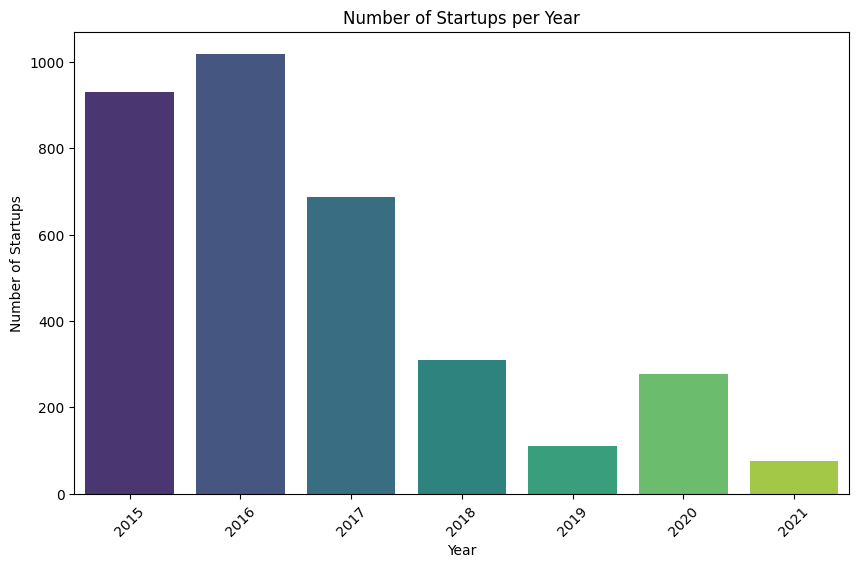

In [43]:
# Correct common year typos: assuming the dataset has years like "01/07/015"  instead of '01/07/2015'
Startups_2015_21['Date'] = Startups_2015_21['Date'].str.replace(r'(\d{2}/\d{2}/)(\d{2})$', r'\g<1>20\2', regex=True)

# Attempt to convert 'Date' column to datetime, coercing errors
Startups_2015_21['Date'] = pd.to_datetime(Startups_2015_21['Date'], format='%d/%m/%Y', errors='coerce')

# Drop rows where Date conversion failed (if any)
startups_data = Startups_2015_21.dropna(subset=['Date'])

# Extract the year from the 'Date' column
startups_data['Year'] = startups_data['Date'].dt.year

# Count the number of startups per year
startups_per_year = startups_data['Year'].value_counts().sort_index()

# Plotting the histogram of the number of startups per year
plt.figure(figsize=(10, 6))
sns.barplot(x=startups_per_year.index, y=startups_per_year.values, palette='viridis')
plt.title('Number of Startups per Year')
plt.xlabel('Year')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45)
plt.show()

Looking at the bar chart depicting the number of startups funded each year from 2015 to 2021, I can draw several conclusions:

1) Peak in Early Years: There was a noticeable peak in startup funding in 2015 and 2016. This suggests a robust investment climate or a burst of entrepreneurial activity during these years. Perhaps a booming economy or favorable startup policies played a significant role.

2) Decline After 2016: After 2016, there was a clear decline in funding, with a particularly sharp drop in 2017. The downward trend continued, though more gradually, through to 2021. Several factors might explain this:
- Market Saturation: As the startup ecosystem matured, market saturation could have led to increased competition for funding.
- Economic Factors: Economic downturns or changes in investor sentiment could have reduced the availability of funds.
- Policy Changes: Shifts in government policies related to startups or investments might have influenced funding dynamics.

3) Significant Drop in 2020: The steep decline in 2020 coincides with the COVID-19 pandemic's onset. The pandemic likely made investors more cautious and posed unprecedented challenges for businesses. This cautious approach seemed to persist into 2021, reflecting ongoing uncertainties or potential economic impacts.

4) Potential Data Issues: It’s important to consider the possibility of incomplete data, particularly for 2021. There might have been delays in capturing all data for that year, contributing to an apparent further decline.

5) Impact on Sectors: A more detailed analysis by sector would help understand which industries were most affected. Some sectors, like healthcare or remote work technologies, might have boomed, while others, such as travel and hospitality, likely faced significant challenges.

6) Resilience and Recovery: It’s crucial to monitor the resilience of the startup ecosystem and look for signs of recovery post-pandemic. A continued decline into 2021 might signal a more prolonged impact of the pandemic, whereas signs of stabilization or recovery could indicate adaptability and a resurgence of investor confidence.

## Visualisation 2: Total Funding Amount Over Years

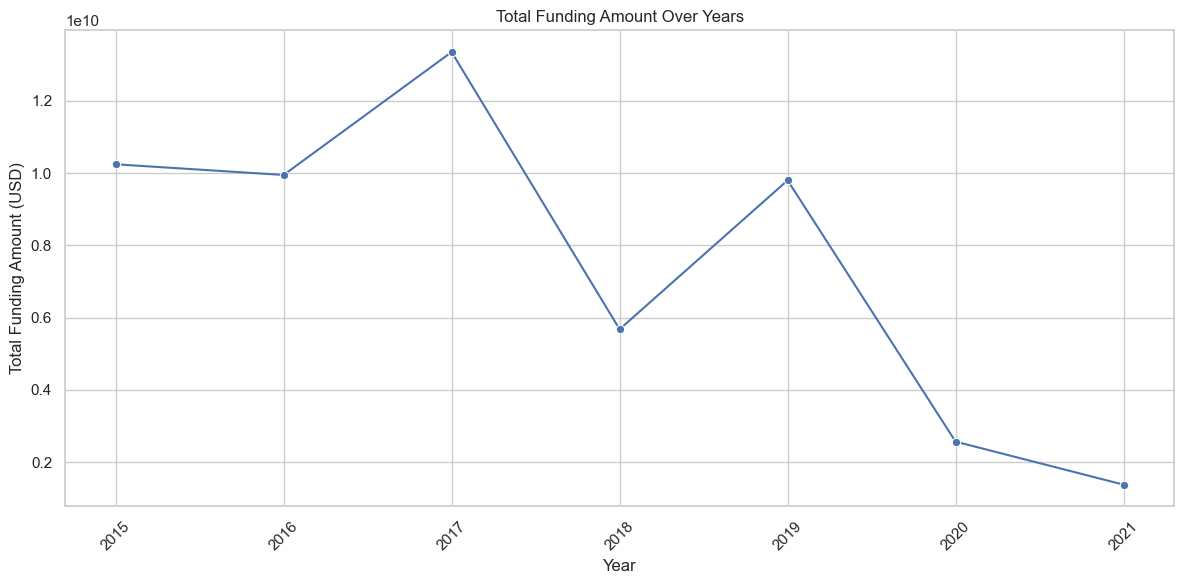

(count         3408.00
 mean      15537412.32
 std       96402807.03
 min          10000.00
 25%         900000.00
 50%        4000000.00
 75%       10383440.53
 max     3900000000.00
 Name: Amount_usd, dtype: float64,
 Year
 2015.00   10241156752.81
 2016.00    9946000138.51
 2017.00   13347505267.69
 2018.00    5676273684.48
 2019.00    9797668317.46
 2020.00    2566878551.76
 2021.00    1376018489.97
 Name: Amount_usd, dtype: float64)

In [44]:
# Convert 'Date' column to datetime
Startups_2015_21['Date'] = pd.to_datetime(Startups_2015_21['Date'], errors='coerce')

# Extract year from the 'Date' column for trend analysis
Startups_2015_21['Year'] = Startups_2015_21['Date'].dt.year

# Drop rows with NaT in 'Date' column if any exist after conversion
startup_data = Startups_2015_21.dropna(subset=['Date'])

# Descriptive statistics of the numerical columns
desc_stats = startup_data['Amount_usd'].describe()

# Trend analysis - Total funding amount per year
trend_yearly = startup_data.groupby('Year')['Amount_usd'].sum()

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot for trend analysis
plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_yearly, marker='o')
plt.title('Total Funding Amount Over Years')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount (USD)')
plt.xticks(trend_yearly.index, rotation=45)
plt.tight_layout()
plt.show()

desc_stats, trend_yearly

Analyzing the descriptive statistics for the 'Amount_usd' column, here's what I've noticed:

- Count: The dataset includes 3,408 transactions.
- Mean: The average funding amount is approximately USD 15.5 million.
- Standard Deviation: There's a very high standard deviation at USD 96.4 million, indicating a significant range in funding amounts.
- Minimum: The smallest funding recorded is USD 10,000.
- 25th Percentile: At USD 900,000, this tells me that 25% of the funding amounts are below this figure.
- Median: The median funding amount is USD 4 million, which is significantly lower than the mean, suggesting a right-skewed distribution.
- 75th Percentile: USD 10.37 million is the cutoff for the top 25% of funding amounts.
- Maximum: The largest funding amount recorded is USD 3.9 billion.

Looking at the trend analysis of total funding amount over the years, significant funding activities occurred in 2015, 2016, and especially 2017, which saw the peak. However, there's been a decline in total funding since 2019, hitting its lowest in 2021. This decline could be attributed to several factors including market conditions or data completeness.

Also, considering the impact of the COVID-19 pandemic, which started affecting global markets by the end of 2019 and persisted through 2020 and 2021, I can infer several potential effects on startup and venture funding:

1) Investor Caution: During times of economic uncertainty, investors tend to be more conservative, favoring companies at later stages or those in industries less impacted by economic downturns.
2) Operational Challenges for Startups: Startups, particularly in specific industries, faced hurdles due to lockdowns, supply chain disruptions, and shifts in consumer preferences, making them less appealing to investors.
3) Shift in Consumer Behavior: The pandemic accelerated the shift towards digital services, healthcare, and remote work, likely redirecting funding towards startups in these areas.
4) Cash Conservation: Startups and venture capital firms may have focused more on conserving cash and sustaining existing portfolio companies rather than pursuing new investments.
5) Market Volatility: The financial markets were highly volatile during the initial stages of the pandemic, impacting the venture capital environment by potentially reducing investment activity as investors awaited more stable conditions.
6) Travel Restrictions: The pandemic also imposed travel restrictions that complicated due diligence processes, typically involving in-person meetings and site visits, which could slow down or even halt investment deals.

To fully grasp the impact of COVID-19 on the startup funding landscape, a more detailed examination across different industries is necessary, as the effects are not uniformly distributed. While startups in sectors like digital communication, health technology, and e-commerce might have seen an uptick in funding, those in travel, hospitality, and offline retail likely encountered greater challenges.

## Visualisation 3: Distribution of startup counts by Industry vertical

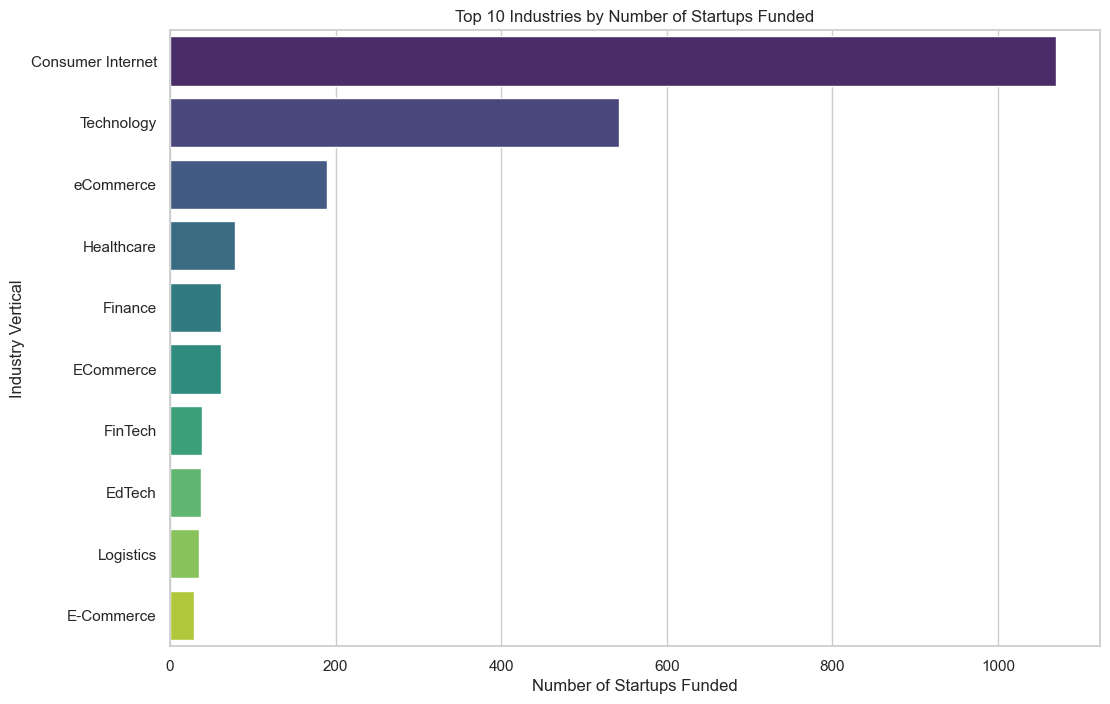

In [45]:
# Create a figure with specified dimensions for better visualization.
plt.figure(figsize=(12, 8))

# Retrieve the top 10 most common industries from 'Industry_vertical' and store their counts.
industry_counts = Startups_2015_21['Industry_vertical'].value_counts().head(10)

# Create a horizontal bar plot showing the top 10 industries by number of startups funded.
sns.barplot(y=industry_counts.index, x=industry_counts.values, palette="viridis")

# Set the title and labels for clarity in the visual representation.
plt.title('Top 10 Industries by Number of Startups Funded')
plt.xlabel('Number of Startups Funded')
plt.ylabel('Industry Vertical')

# Display the plot.
plt.show()

Top 10 Industries by Number of Startups Funded

Looking at this bar plot, I'm immediately struck by the dominance of the Consumer Internet industry—it clearly leads by a significant margin, emphasizing how integral online platforms have become to our daily lives. The Technology and eCommerce sectors follow, which doesn’t surprise me given the digital transformation that's been accelerating worldwide. It’s evident these sectors are thriving due to high consumer demand, potential for innovation, and perhaps also due to the digital pivot necessitated by the pandemic.

It's quite interesting to see Healthcare and FinTech also featuring prominently on the chart, showing that startups in these industries are garnering substantial attention and funds. These industries are at the forefront of innovation, dealing with essential services like health and finance, which have been areas of intense focus, especially lately. The presence of EdTech and Logistics highlights their growing importance in a world that’s rapidly adopting remote learning and relying on efficient supply chains. It’s fascinating to see these market trends and think about the impact these funded startups could have on our future.

## Visualisation 4: Average Funding Amount by Industry Vertical

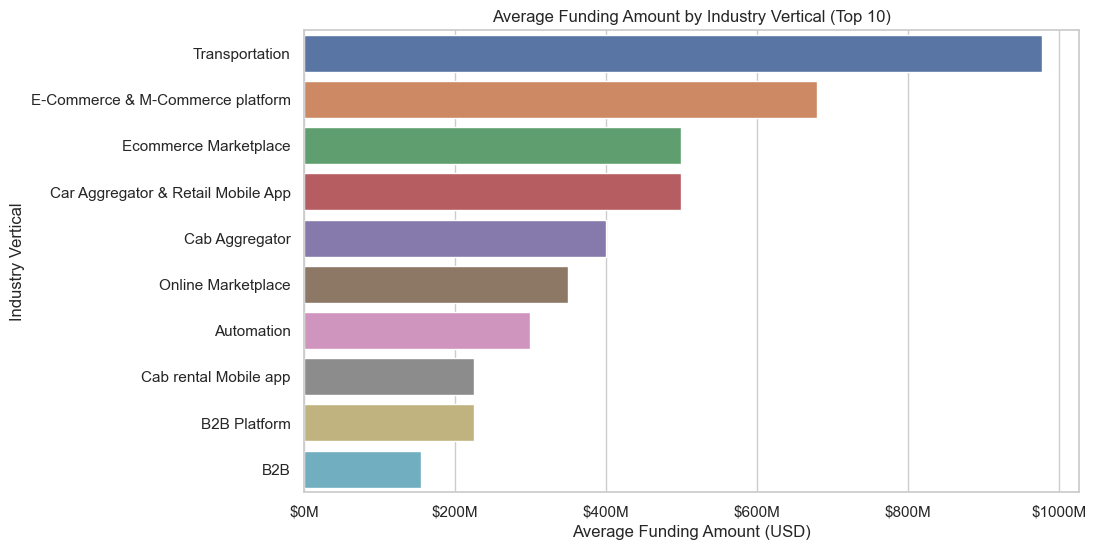

In [46]:
# Set the aesthetic style of the plots to 'whitegrid' for better visibility of data points.
sns.set(style="whitegrid")

# Create a figure for the plot with specified dimensions for clarity.
plt.figure(figsize=(10, 6))

# Calculate and store the average funding amount by industry, selecting the top 10 highest averages.
industry_avg = Startups_2015_21.groupby('Industry_vertical')['Amount_usd'].mean().sort_values(ascending=False)[:10]

# Create a horizontal bar plot displaying the average funding by industry vertical.
sns.barplot(x=industry_avg.values, y=industry_avg.index)

# Format the x-axis to show the funding amounts in millions of dollars for readability.
formatter = ticker.FuncFormatter(lambda x, _: f'${int(x / 1E6)}M')
plt.gca().xaxis.set_major_formatter(formatter)

# Set the title and axis labels to provide context about the data being visualized.
plt.title('Average Funding Amount by Industry Vertical (Top 10)')
plt.xlabel('Average Funding Amount (USD)')
plt.ylabel('Industry Vertical')

# Display the plot.
plt.show()


Looking at the top 10 industry verticals by average funding, it's clear that Transportation is leading the pack, likely due to the sector's potential amplified by tech advances. 
Close behind are E-Commerce & M-Commerce platforms, riding the wave of the digital shopping surge. Tech-centric areas like Car Aggregators and Online Marketplaces are also drawing hefty investments, reflecting a trend towards digital and convenience. Automation and B2B platforms, while lower on the scale, still pull in significant funds, suggesting a healthy interest in business optimization technologies. This chart tells a compelling story of where the market's heading and which sectors are drawing investors' eyes—and dollars.

## Visualisation 5: Distribution of start-up counts by City location

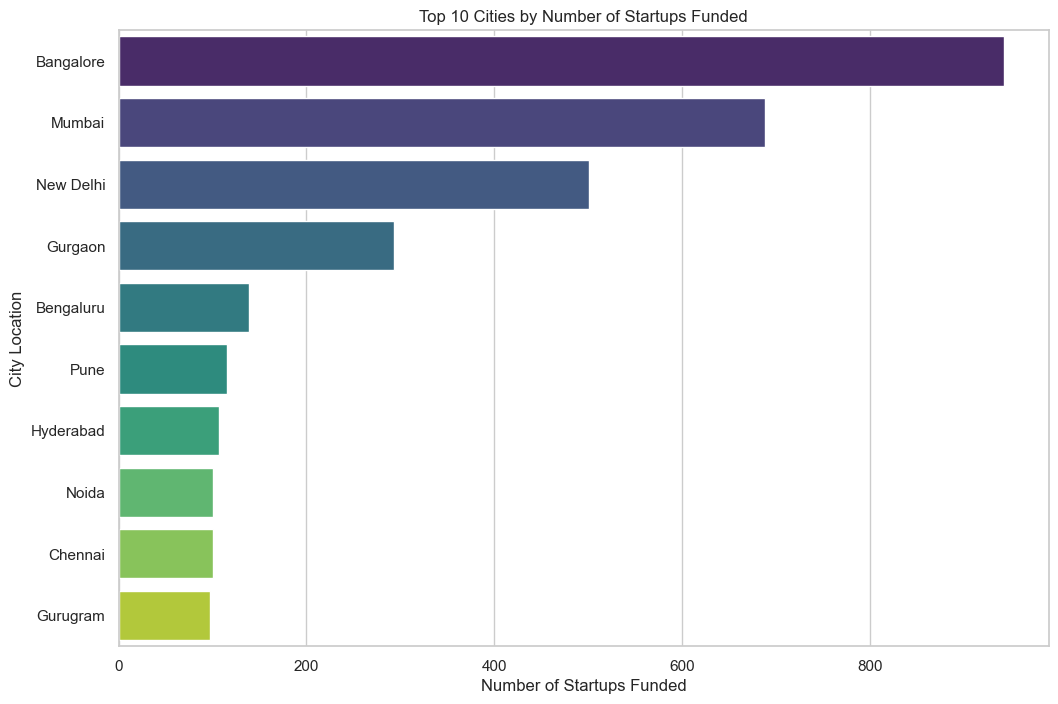

In [47]:
# Create a figure with specified dimensions for better visualization.
plt.figure(figsize=(12, 8))

# Retrieve the top 10 cities with the most startups and store their counts.
city_counts = Startups_2015_21['City_location'].value_counts().head(10)

# Create a horizontal bar plot to display the distribution of startup counts by city location.
sns.barplot(y=city_counts.index, x=city_counts.values, palette="viridis")

# Set the title and labels for clarity in the visual representation.
plt.title('Top 10 Cities by Number of Startups Funded')
plt.xlabel('Number of Startups Funded')
plt.ylabel('City Location')

# Display the plot.
plt.show()


Top 10 Cities by Number of Startups Funded:

From this bar chart, I can see that it illustrates the top 10 cities by the number of startups funded. Bangalore, topping the chart, I can infer that Bangalore, being known as the Silicon Valley of India, evidently leads the pack, which doesn't come as a surprise given its well-established tech industry and startup culture. Mumbai following closely behind makes sense due to its financial infrastructure and status as a commercial capital. It's also interesting to see New Delhi and Gurgaon prominently featured, indicating the spread of startup culture across different regions.

The chart provides clear evidence of these cities' roles as crucial startup ecosystems in India, likely providing the right mix of infrastructure, investor interest, and a culture of innovation that is so crucial for startups to thrive.

## Visualisation 6: Investment Type analysis

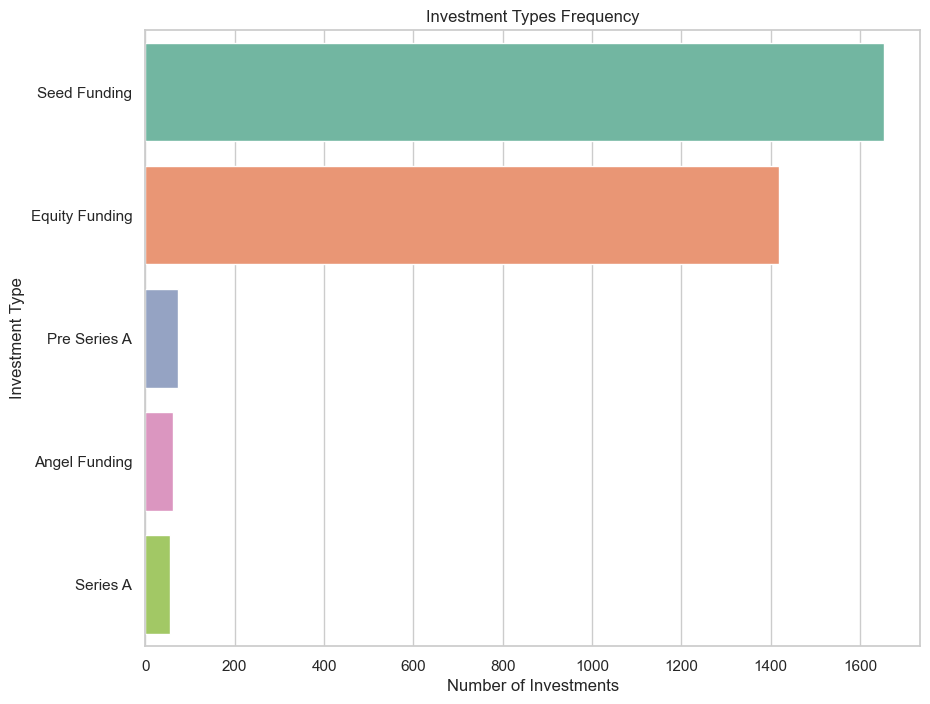

In [48]:
# Group by 'Investment_type' to count the occurrences and select the top 5
investment_types = startup_data['Investment_type'].value_counts().sort_values(ascending=False)[:5]

# Create a figure with specified dimensions for better visualization
plt.figure(figsize=(10, 8))

# Plotting a horizontal bar plot for investment types
sns.barplot(y=investment_types.index, x=investment_types.values, palette="Set2")

# Set the title and labels for clarity in the visual representation
plt.title('Investment Types Frequency')
plt.xlabel('Number of Investments')
plt.ylabel('Investment Type')

# Display the plot
plt.show()

The bar chart delineating the frequency of investment types unveils several trends:

1) Predominance of Seed and Early-Stage Investments: The dataset exhibits a high occurrence of seed and early-stage investments. This pattern is anticipated, as a plethora of startups are at the inception stage and are actively seeking initial capital influx to prove their concepts and initiate operations.

2) Growth-Stage Investment Insights: There's a noticeable drop-off in the frequency of Series A and Series B investments when compared to seed rounds. This is indicative of the natural attrition rate of startups, where only a subset successfully navigate beyond the early stages and continue to scale to a level where larger, more substantial rounds of funding are warranted.

3) Rarity of Specialized Investments: Investment vehicles such as debt financing and private equity emerge less frequently within the dataset. Their presence often aligns with more mature startups that exhibit consistent revenue streams and stable growth trajectories, or those looking for leverage in transactions without relinquishing equity.

4) Angel Investment Trends: Angel investments occupy a unique space within the funding landscape, providing vital support to startups during their nascent phase. The number of such investments reflects the activity and inclination of high-net-worth individuals and syndicates to foster early-stage companies.

The granularity of these investment types and their respective frequencies are pivotal for comprehending the funding landscape. Entrepreneurs can leverage this data to strategize their fundraising approaches, targeting the most prevalent types of investments that align with their startup's stage of development. Investors can decipher these patterns to identify prevailing investment trends and assess the risk-to-reward ratios inherent to different stages of startup funding.








## Visualisation 7: The distribution of funding amounts

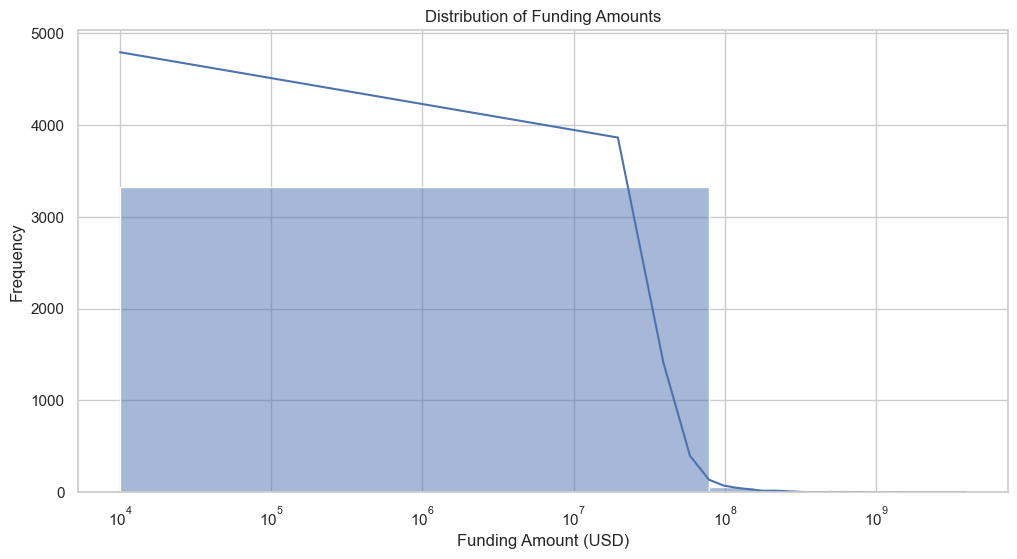

In [49]:
# Create a figure with specified dimensions for better visualization
plt.figure(figsize=(12, 6))

# Plotting a histogram of the distribution of funding amounts
sns.histplot(Startups_2015_21['Amount_usd'], bins=50, kde=True)

# Set the title and labels for clarity in the visual representation
plt.title('Distribution of Funding Amounts')
plt.xlabel('Funding Amount (USD)')
plt.ylabel('Frequency')

# Set the x-axis scale to logarithmic due to the wide range of funding amounts
plt.xscale('log')

# Display the plot
plt.show()

Distribution of Funding Amounts

The histogram illustrates the frequency of various funding amounts within the dataset. Because startup funding are ranging from a few thousand dollars to several billion, the logarithmic scale on the x-axis allows us to compress the wide range of values into a more visually interpretable form.

- Right-Skewed Distribution: Most startups receive a relatively small amount of funding, and this is reflected in the concentration of bars at the lower end of the scale. A right-skewed distribution means that while most startups receive lower funding amounts, there is a long tail on the right side representing a small number of startups that receive very large investments.

- Outliers and Large Investments: The long tail to the right suggests that there are outliers with exceptionally large amounts of funding. These represent later-stage funding rounds, such as Series B, C, or growth equity rounds.